## Workflow 
###1. Dadata wrangling 
###2. EDA 
###3. Applying appropriate machine learning to solve the problem 

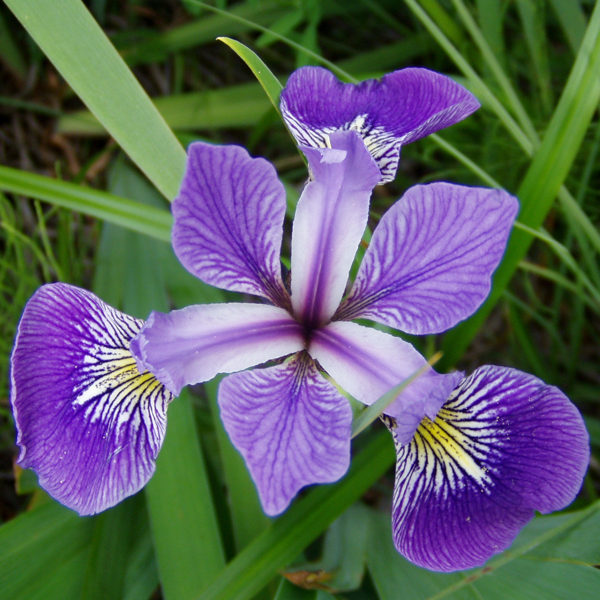

In [1]:
import pandas as pd ## Manupulating numberical tables and data 
import numpy as np ## Mathematical calculations  
import matplotlib.pyplot as plt ## Visualisation 
import seaborn as sns ## Visualisation of data in the form of bar chart , piechart etc 

In [67]:
df=pd.read_csv("/content/Iris_new.csv") ## read the csv file 

In [77]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
df.rename(columns={'Species':'species'})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [81]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
print(df.shape) # find the shape of data 

(150, 5)


In [83]:
df.isnull().sum() ## Check missing values 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [84]:
df.info() ## Information about the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
df.describe() ## Description about the data 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [86]:
df['Species'].value_counts() ## Count the value of each species  

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [87]:
print("the number of the data duplicated",df.duplicated().sum()) ## Find the duplicate values 

the number of the data duplicated 3


#### Some Exploratry Data Analysis with Iris 

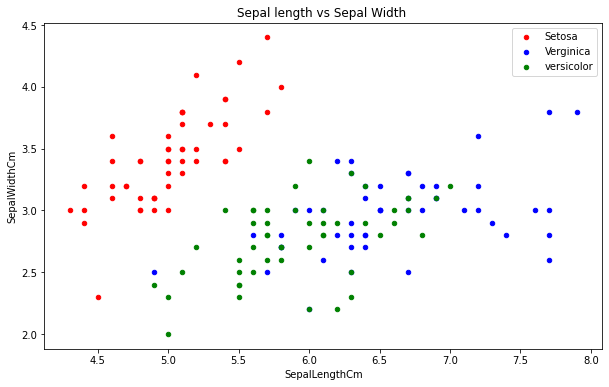

In [90]:

fig = df[df.Species=='Iris-setosa'].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color='red',label='Setosa')
df[df.Species=="Iris-virginica"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color='blue',label='Verginica',ax=fig)
df[df.Species=="Iris-versicolor"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color='green',label='versicolor',ax=fig)
fig.set_xlabel("SepalLengthCm")
fig.set_ylabel("SepalWidthCm")
fig.set_title("Sepal length vs Sepal Width ")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#### Above graph shows relationship between Sepal width  and Sepal  length

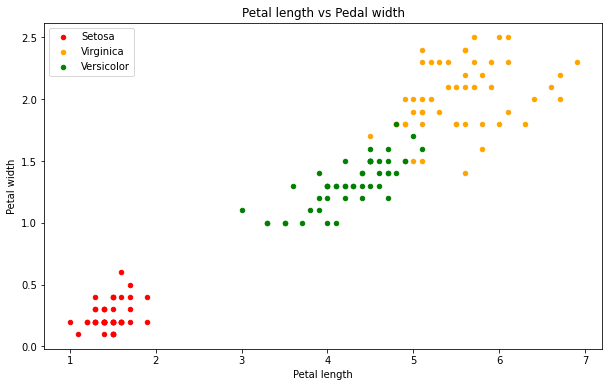

In [93]:
fig=df[df.Species=="Iris-setosa"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm", color="red",label="Setosa")
df[df.Species=="Iris-virginica"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm", color="orange",label="Virginica",ax=fig)
df[df.Species=="Iris-versicolor"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm", color="green",label="Versicolor",ax=fig)
fig.set_xlabel("Petal length")
fig.set_ylabel("Petal width")
fig.set_title("Petal length vs Pedal width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


#### Above graph shows relationship between Petal width and Petal length

#### In the above graph the relationship between the Petal width and the Petal length have better cluster division compare to above sepal length and width 

#### See the width and length distrubted 

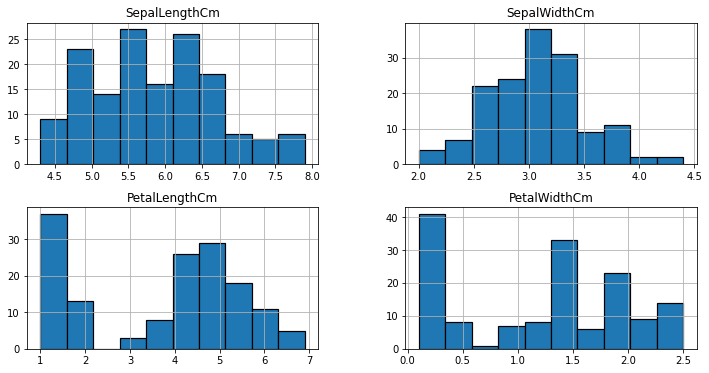

In [94]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### How length and width vary according to the species 

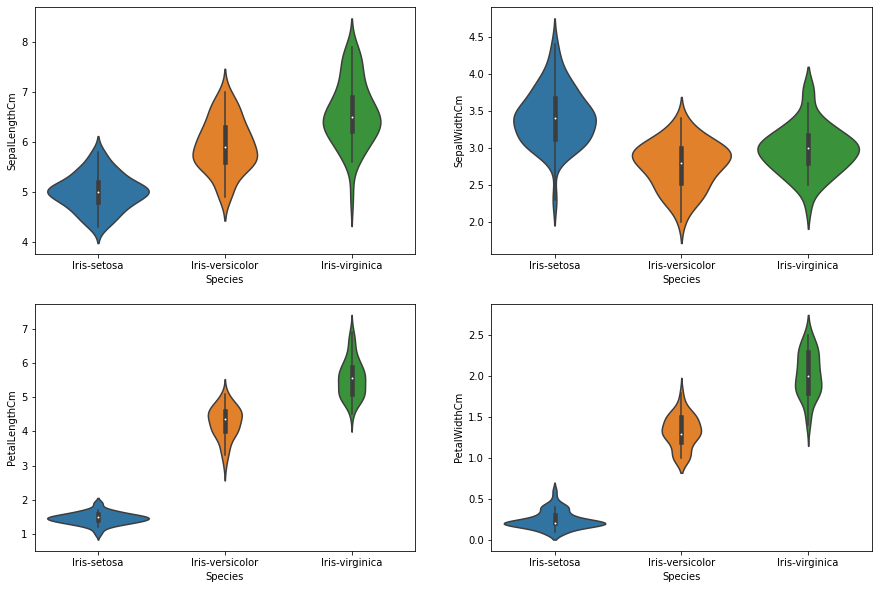

In [97]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) ## subplot(nrows,ncols,index)
sns.violinplot(x="Species",y="SepalLengthCm", data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="SepalWidthCm", data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="PetalWidthCm",data=df)


### Problem is classification ,now we use the classification algorithms to build the model.

#####  Classification: samples belong to two and more classes we want to learn from already labeled  data how to predict the class of unlabel data 

In [98]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [99]:
df.shape

(150, 5)

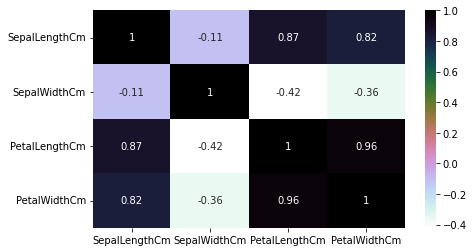

In [100]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

###-----Observation-----
The corelation between sepal & petal length VS length , width VS width  and where as sepal & petal length VS width is low.  

#### Steps to be taken when applying an algorithm 
#####1. Split the data in to training and testing dataset.
#####2. Select the algorithm based on the problem(classification or regression) whatever required. 
#####3. Then pass the training dataset to the algorithm to train it , here we use **.fit()** method.
#####4.Then pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
#####5.We then check the accuracy by passing the predicted outcome and the actual output to the model.

### Taking the training dataset

#### Splitting the data into training and testing Dataset

In [113]:
train , test= train_test_split(df,test_size=0.3) # Split the data into train and test 70% for training and 30% for test
print(train_X.shape)
print(test.shape) 

(105, 4)
(45, 5)


In [114]:
train_X= train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training dataset
train_y=df.Species  #output of our training data 
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species #taking the test dataset 



In [123]:
train_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
59,5.2,2.7,3.9,1.4
113,5.7,2.5,5.0,2.0


In [124]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
17,5.1,3.5,1.4,0.3
85,6.0,3.4,4.5,1.6


In [125]:
train_y.head() # Output of the training data

59     Iris-versicolor
113     Iris-virginica
40         Iris-setosa
105     Iris-virginica
62     Iris-versicolor
Name: Species, dtype: object

### Support Vector Machine (SVM)

In [129]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


#### Logistic Regression

In [130]:
model=LogisticRegression()
model.fit(train_X, train_y)
prediction=model.predict(test_X)
print("the accuracy of Logistic Regression is",metrics.accuracy_score(prediction,test_y))

the accuracy of Logistic Regression is 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Decision Tree 

In [134]:
model =DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print("The accuracy of Decision Tree is:",metrics.accuracy_score(prediction,test_y))

The accuracy of Decision Tree is: 0.9555555555555556


### K Nearest Neighbours

In [136]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


### Check the accuracy for the various value of n for k-Neighbors 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7feee3649d90>,
 <a list of 10 Text major ticklabel objects>)

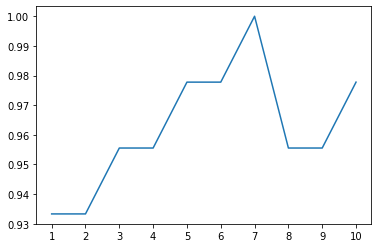

In [137]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

###We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

#### Creating Petals And Sepals Training Data

In [139]:
petal=df[['PetalLengthCm','PetalWidthCm','Species']]
sepal=df[['SepalLengthCm','SepalWidthCm','Species']]

In [141]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

### SVM

In [143]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


###Logistic Regression

In [144]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree

In [145]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [149]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333



####Observations:
###### Using Petals over Sepal for training the data gives a much better accuracy.
######This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
##### Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.


---------------------**Compeleted**---------------------------